# Set up
The packages we need

In [3]:
import os #The os module provides a way of using operating system dependent functionality e.g. importing files or changing directories
import re # The re module provides support for regular expressions e.g. searching, matching, and splitting the string according to specified patterns.
import pandas as pd # The pandas module provides support to work with datasets e.g. data cleaning andand transformation
import nltk # the NLTK libraries allows you to work with human language data (natural language processing). It includes libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize # This is a specific import from the nltk.tokenize module, bringing in the word_tokenize function, which is used to split text into words.
import numpy as np # package for scientific computing with Python. This will help with performing linear algebra and mathematic operations on your dataset
import codecs

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


# Our Dataset
The Statistical Accounts of Scotland are a series of documentary publications, related in subject matter though published at different times, covering life in Scotland in the 18th and 19th.

The Old (or First) Statistical Account of Scotland was published between 1791 and 1799 by Sir John Sinclair of Ulbster. The New (or Second) Statistical Account of Scotland published under the auspices of the General Assembly of the Church of Scotland between 1834 and 1845. These first two Statistical Accounts of Scotland are unique records of life during the agricultural and industrial revolutions in Europe.

## Structure of the dataset
The original publication has been scanned and OCRed and each single record has been collected in a .txt file. The name of each file contain information about the document itself. For example StAS.2.15.91.P.Orkney.Cross_and_Burness

- StAs.2.15.91 -> Second Statistical Account
- P -> Parish (Contain information from the Parish)

- Orkney -> Area of interest (Scotland has been divided in 33 Areas)

- Cross_and_Burness -> Parish

We are going to see how to use this to extract information about all our text later but the first thing we need to do is to create a single dataframe (table) that will contain all the texts otherwise it will be very difficult to manage the data.

## Prepare the dataset
All our .txt files are in a directory named Account so I can write a function that will loop through each of the files extract the text and the tile of each file and put them all in a table.

Doing it manually would take a ridiculous amount of time but that is what computer are for so let’s see what we can do.

### 1. Create a new object that contain the path to our directory

In [1]:
 !git clone https://github.com/DCS-training/StatAccountScotland

Cloning into 'StatAccountScotland'...
remote: Enumerating objects: 29035, done.
remote: Counting objects: 100% (29035/29035), done.
remote: Compressing objects: 100% (28872/28872), done.
remote: Total 29035 (delta 94), reused 29029 (delta 94), pack-reused 0 (from 0)
Receiving objects: 100% (29035/29035), 38.35 MiB | 18.06 MiB/s, done.
Resolving deltas: 100% (94/94), done.
Updating files: 100% (29088/29088), done.


In [4]:
# Create a string object that contains the path to your directory.
text_files_dir = "StatAccountScotland/Accounts"

# Create an empty DataFrame.
text_data = pd.DataFrame(columns=['title', 'text'])

# Get a list of all .txt files in the specified directory
text_files = [os.path.join(text_files_dir, f) for f in os.listdir(text_files_dir) if f.endswith('.txt')]

# Iterate through each text file
for file_path in text_files:
    # Open the file with codecs to handle the encoding
    with codecs.open(file_path, 'r', encoding='latin1') as file:
        # Read lines, convert to lowercase and join them into a single string
        text = ' '.join([line.strip().lower() for line in file])

    # Extract the title from the filename (remove path and file extension)
    title = os.path.splitext(os.path.basename(file_path))[0]

    # Create a new DataFrame for the current file and append it to the main DataFrame using pd.concat
    new_row = pd.DataFrame({'title': [title], 'text': [text]})
    text_data = pd.concat([text_data, new_row], ignore_index=True)

In [5]:
#Look at the first five rows
text_data.head()

,title,text
0,StAS.1.6.459.P.Dumfries.Sanquhar,of sanquhar. miscellaneous observations.-the...
1,StAS.2.14.257.P.Ross_and_Cromarty.Fodderty,fodderty. 257 t...
2,StAS.1.21.163.A.NullCounty.General_Appendixgen...,the statistical account. slowly; to which tw...
3,StAS.1.3.263.P.Roxburgh.Makerston,"of makerston. parishes. about 50 years ago,..."
4,StAS.2.12.245.P.Aberdeen.Belhelvie,belhelvie. 245 imp...


In [6]:
#Look at the last five rows
text_data.tail()

,title,text
29078,StAS.2.4.41.P.Dumfries.Tinwald_and_Trailflat,tinwald and trailflat. 41 ...
29079,StAS.2.6.309.P.Lanark.Avondale,avondale. \t\t\t 309 it stands on a rocky...
29080,StAS.2.7.465.P.Renfrew.Greenock,greenock. 465 gram...
29081,StAS.1.6.239.P.Perth.Kinnaird,"of kinnaird. nually 10 or 12 black-cattle, i..."
29082,StAS.2.12.174.P.Aberdeen.Fintray,174 aberdeenshire. inns...


In [7]:
# Getting descriptive statistics
print(text_data.describe())

text_data.info()

                                   title  \
count                              29083   
unique                             29083   
top     StAS.2.12.174.P.Aberdeen.Fintray   
freq                                   1   

                                              text  
count                                        29083  
unique                                       29021  
top      the  statistical account  of  scotland.    
freq                                            19  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29083 entries, 0 to 29082
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   29083 non-null  object
 1   text    29083 non-null  object
dtypes: object(2)
memory usage: 454.6+ KB


In [8]:
# We can also save our new dataframe as a.csv file so that we will be easily re-import it
text_data.to_csv('text_data.csv', index=False)

In [9]:
print(text_data.iloc[100, 1])
# try to explore the dataset by looking at different texts how would you do so?
# Can you identify any formatting issue?

 statistical account  some other burial ground; and all we can conjecture about them is, that they have been placed in the wall when the church was first built, or afterwards when the wall might have been repaired.  not far from the church, is a farm cal- led spear-mill, which is said to have derived its name from a battle having been fought there with spears*.  the story re lated of the battle is this.  the north-esk by a great flood had swept away the mill of canterland at kinnardie.  the proprietor of canterland and balmaleedie, not knowing where to build another, requested of the proprietor of aberluthnet, that he would allow him to carry the mill-dam, taken from the north-esk, and the burn of aberluthnet, after turning his mill a little farther towards the east, until both in one current reached his property.  this the proprietor of aber- luthnet absolutely refused, and the other strenuously insisted that it should be done by force, if he would not consent to it. in a night or two

# Clean and Format the Data
Our dataset contains all the info that we want but there are still some formatting issues and informations that are all crammed in a single cell. Here is where Regex can come handy!

## Removing the sequences of a dash followed by one or more spaces

In [10]:
# Define a function to replace patterns in string columns
def replace_pattern(text):
    if isinstance(text, str):
        # Use re.sub() to replace the pattern '-[space]' followed by one or more spaces
        return re.sub(r'-\s+', '', text)
    return text

In [11]:
ScotdataClean = text_data.applymap(replace_pattern)

<ipython-input-11-c375ca5c32b1>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ScotdataClean = text_data.applymap(replace_pattern)


In [12]:
print(ScotdataClean.iloc[100, 1])

 statistical account  some other burial ground; and all we can conjecture about them is, that they have been placed in the wall when the church was first built, or afterwards when the wall might have been repaired.  not far from the church, is a farm called spear-mill, which is said to have derived its name from a battle having been fought there with spears*.  the story re lated of the battle is this.  the north-esk by a great flood had swept away the mill of canterland at kinnardie.  the proprietor of canterland and balmaleedie, not knowing where to build another, requested of the proprietor of aberluthnet, that he would allow him to carry the mill-dam, taken from the north-esk, and the burn of aberluthnet, after turning his mill a little farther towards the east, until both in one current reached his property.  this the proprietor of aberluthnet absolutely refused, and the other strenuously insisted that it should be done by force, if he would not consent to it. in a night or two aft

## Extract more info from the Dataset

To do the following steps we are using regex. Short for regular expression, a regex is a string of text that lets you create patterns that help match, locate, and manage text. Think find and replace in Word

### Extract area and parish from the title
P=Parish

*  P=Parish
*  C=Miscellanea
*  G=General Observations
*  A=Appendix
*  F=General
*  I=Index
*  M=Map

I want to be able to subset the dataset by those and I also want to have them both as a code as a description to do so I need to write a if else clause

In [13]:
# Extract single characters as specified by the regex pattern
ScotdataClean['Type'] = ScotdataClean['title'].str.extract(r'.\.(P|C|G|A|F|M|I)\.')[0]# checking for .(one of my letters). and exporting only that part

ScotdataClean.head()
ScotdataClean.tail()


,title,text,Type
29078,StAS.2.4.41.P.Dumfries.Tinwald_and_Trailflat,tinwald and trailflat. 41 ...,P
29079,StAS.2.6.309.P.Lanark.Avondale,avondale. \t\t\t 309 it stands on a rocky...,P
29080,StAS.2.7.465.P.Renfrew.Greenock,greenock. 465 gram...,P
29081,StAS.1.6.239.P.Perth.Kinnaird,"of kinnaird. nually 10 or 12 black-cattle, i...",P
29082,StAS.2.12.174.P.Aberdeen.Fintray,174 aberdeenshire. inns...,P


In [14]:
# Define a mapping dictionary for the types to descriptive text
type_map = {
    'P': 'Parish',
    'C': 'Miscellanea',
    'G': 'General Observations',
    'A': 'Appendix',
    'F': 'General',
    'M': 'Map',  # Presumed placeholder for 'M' since it wasn't defined
    'I': 'Index'
}


In [15]:
# Apply the mapping
ScotdataClean['TypeDescriptive'] = ScotdataClean['Type'].map(type_map).fillna('Map')

ScotdataClean.head()
ScotdataClean.tail()

,title,text,Type,TypeDescriptive
29078,StAS.2.4.41.P.Dumfries.Tinwald_and_Trailflat,tinwald and trailflat. 41 ...,P,Parish
29079,StAS.2.6.309.P.Lanark.Avondale,avondale. \t\t\t 309 it stands on a rocky...,P,Parish
29080,StAS.2.7.465.P.Renfrew.Greenock,greenock. 465 gram...,P,Parish
29081,StAS.1.6.239.P.Perth.Kinnaird,"of kinnaird. nually 10 or 12 black-cattle, i...",P,Parish
29082,StAS.2.12.174.P.Aberdeen.Fintray,174 aberdeenshire. inns...,P,Parish


### RecordId
I want the first bit of the title as the RecordId of the document

In [16]:
# when Regex expression starts becoming quite long you can define the pattern and then call it
pattern = r'(StAS(\.[a-z]?\d+[a-z]?)*)\.(P|C|G|A|F|M|I)\.([^\.]+)\.'

ScotdataClean['RecordID'] = ScotdataClean['title'].str.extract(pattern)[0]
ScotdataClean.head()

,title,text,Type,TypeDescriptive,RecordID
0,StAS.1.6.459.P.Dumfries.Sanquhar,of sanquhar. miscellaneous observations.-the...,P,Parish,StAS.1.6.459
1,StAS.2.14.257.P.Ross_and_Cromarty.Fodderty,fodderty. 257 t...,P,Parish,StAS.2.14.257
2,StAS.1.21.163.A.NullCounty.General_Appendixgen...,the statistical account. slowly; to which tw...,A,Appendix,StAS.1.21.163
3,StAS.1.3.263.P.Roxburgh.Makerston,"of makerston. parishes. about 50 years ago,...",P,Parish,StAS.1.3.263
4,StAS.2.12.245.P.Aberdeen.Belhelvie,belhelvie. 245 imp...,P,Parish,StAS.2.12.245


Now that is a scary Regex function but let's break it down

*  **'StAS\.\d+\.\d+\.\d+\.'**: This part strictly matches the notation like StAS.2.1.628., which includes 'StAS' followed by three numeric segments separated by dots.
*  **'(P|C|G|A|F|M|I)'**: Captures one of the specified letters, likely representing a category.
*  **'([^\\.]+)\\.'**: Captures the next segment up to a dot without including it. It uses '[^\.]+', which means "one or more characters that are not a dot."

### Area

I also want to extract the area that is the bit after p/c/g/a/f/m/i

In [17]:
pattern = r'(StAS(\.[a-z]?\d+[a-z]?)*)\.(P|C|G|A|F|M|I)\.([^\.]+)\.'

ScotdataClean['Area'] = ScotdataClean['title'].str.extract(pattern)[3]
ScotdataClean.head()

,title,text,Type,TypeDescriptive,RecordID,Area
0,StAS.1.6.459.P.Dumfries.Sanquhar,of sanquhar. miscellaneous observations.-the...,P,Parish,StAS.1.6.459,Dumfries
1,StAS.2.14.257.P.Ross_and_Cromarty.Fodderty,fodderty. 257 t...,P,Parish,StAS.2.14.257,Ross_and_Cromarty
2,StAS.1.21.163.A.NullCounty.General_Appendixgen...,the statistical account. slowly; to which tw...,A,Appendix,StAS.1.21.163,NullCounty
3,StAS.1.3.263.P.Roxburgh.Makerston,"of makerston. parishes. about 50 years ago,...",P,Parish,StAS.1.3.263,Roxburgh
4,StAS.2.12.245.P.Aberdeen.Belhelvie,belhelvie. 245 imp...,P,Parish,StAS.2.12.245,Aberdeen


### Parish
The last bit that we need to extract is the parish that is the last bit up until the last fullstop

In [18]:
ScotdataClean['Parish'] = ScotdataClean['title'].str.split('.').str[-1]
ScotdataClean.head()

,title,text,Type,TypeDescriptive,RecordID,Area,Parish
0,StAS.1.6.459.P.Dumfries.Sanquhar,of sanquhar. miscellaneous observations.-the...,P,Parish,StAS.1.6.459,Dumfries,Sanquhar
1,StAS.2.14.257.P.Ross_and_Cromarty.Fodderty,fodderty. 257 t...,P,Parish,StAS.2.14.257,Ross_and_Cromarty,Fodderty
2,StAS.1.21.163.A.NullCounty.General_Appendixgen...,the statistical account. slowly; to which tw...,A,Appendix,StAS.1.21.163,NullCounty,General_Appendixgen_App_Vol6
3,StAS.1.3.263.P.Roxburgh.Makerston,"of makerston. parishes. about 50 years ago,...",P,Parish,StAS.1.3.263,Roxburgh,Makerston
4,StAS.2.12.245.P.Aberdeen.Belhelvie,belhelvie. 245 imp...,P,Parish,StAS.2.12.245,Aberdeen,Belhelvie


Now our dataset is much clenaer and all our metadata are correctly encoded in separate columns in our dataset.
For this workshop we are really just interested in the texts that describe the life in the parishes across scotland rather than indexes and other type of texts so we are going to work from now on a new dataset named 'Parish' that contains only the Type P text

In [32]:
Parish = ScotdataClean[ScotdataClean['Type'] == 'P']

In [20]:
# Getting descriptive statistics
print(Parish.describe())

Parish.info()

                                   title       text   Type TypeDescriptive  \
count                              27065      27065  27065           27065   
unique                             27065      27025      1               1   
top     StAS.2.12.174.P.Aberdeen.Fintray  <diagram>      P          Parish   
freq                                   1          3  27065           27065   

            RecordID   Area    Parish  
count          27065  27065     27065  
unique         22553     33       890  
top     StAS.2.15.19  Perth  Aberdeen  
freq               6   2622       198  
<class 'pandas.core.frame.DataFrame'>
Index: 27065 entries, 0 to 29082
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            27065 non-null  object
 1   text             27065 non-null  object
 2   Type             27065 non-null  object
 3   TypeDescriptive  27065 non-null  object
 4   RecordID         27065 non-null

1. StAS
StAS: This is a literal string. The regex matches sequences that begin with the characters 'StAS'. This likely represents a fixed identifier or prefix in your data.
2. (\\.[a-z]?\d+[a-z]?)
\\.: This matches a literal dot ('.'). In regex, a dot is a special character that typically matches any character, so it needs to be escaped with a backslash (\) to denote a literal dot.
[a-z]?: This matches zero or one lowercase letter. The ? quantifier makes the preceding token in the regex (in this case, [a-z], which is any lowercase letter) optional.
\d+: This matches one or more digits. \d is a shortcut for [0-9], and the + quantifier means "one or more" of the preceding element.
[a-z]?: Again, this matches zero or one lowercase letter, similar to earlier in the pattern.
This part of the expression (\\.[a-z]?\d+[a-z]?) deals with sections in your string that are expected to follow a dot, potentially a letter, a sequence of digits, optionally followed by another letter. This can occur multiple times or not at all as indicated by the enclosing group and * quantifier.

3. *: This quantifier matches zero or more of the preceding element (in this case, the entire group \\.[a-z]?\d+[a-z]? ), allowing for flexibility in how many such sequences appear.
4. \\.(P|C|G|A|F|M|I)
\\.: As before, this matches a literal dot.
(P|C|G|A|F|M|I): This is a capturing group that matches one of the specified uppercase letters. Each letter is separated by a pipe (|), which acts as an "or" operator in regex. This part is designed to match categorizations or types that follow your numeric sequences.
5. \\.
: This, again, matches a literal dot following the category character.
6. ([^\\.]+)
([^\\.]+): This captures one or more characters that are not a dot. The caret (^) inside the square brackets negates the set, so [^\\.] means any character but a dot. The + quantifier ensures one or more characters are captured.
This part is typically used to grab the next segment of the title which could act as an identifier or significant descriptor, not split by dots.
7. Final \\. (dot)
Ends with expecting a literal dot.

In [40]:
#Check for null values
print((Parish == '').sum())

# Remove rows where 'text' is empty or contains only white spaces
Parish = Parish[~Parish['text'].str.strip().eq('')]

#Check for null values again
print((Parish == '').sum())

#ok we are good to go now

title              0
text               0
Type               0
TypeDescriptive    0
RecordID           0
Area               0
Parish             0
Wordtokens         0
dtype: int64
title              0
text               0
Type               0
TypeDescriptive    0
RecordID           0
Area               0
Parish             0
Wordtokens         0
dtype: int64


In [41]:
#export the new dataset
Parish.to_csv('Parish.csv', index=False)

## Explore the dataset we have created

Now that we have a clener dataset from the orignal one we can start explore a bit better what we are dealing with

In [ ]:
# if you get an error when running the next cell it is probably because you have forgotten to import nltk. Without getting back to the top of this notebook you can uncomment the two lines below

#import nltk
#nltk.download('punkt')
#nltk.download('punkt_tab')
#from nltk.tokenize import word_tokenize

In [22]:
# Create a function to count tokens
def tokenize(text):
    return len(word_tokenize(text))

In [23]:
# Tokenize the texts and create a DataFrame with tokens
Parish['Tokens'] = Parish['text'].apply(tokenize)
TokenScotland = pd.DataFrame({
    "Tokens": Parish['Tokens'],
    "Title": Parish['title'],
    "Area": Parish['Area'],
    "Parish": Parish['Parish']
})

<ipython-input-23-4d4d3db32f36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Parish['Tokens'] = Parish['text'].apply(tokenize)


In [24]:
#Let's see what we have created

TokenScotland.info()
TokenScotland.head()

<class 'pandas.core.frame.DataFrame'>
Index: 27065 entries, 0 to 29082
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tokens  27065 non-null  int64 
 1   Title   27065 non-null  object
 2   Area    27065 non-null  object
 3   Parish  27065 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.0+ MB


,Tokens,Title,Area,Parish
0,405,StAS.1.6.459.P.Dumfries.Sanquhar,Dumfries,Sanquhar
1,677,StAS.2.14.257.P.Ross_and_Cromarty.Fodderty,Ross_and_Cromarty,Fodderty
3,375,StAS.1.3.263.P.Roxburgh.Makerston,Roxburgh,Makerston
4,426,StAS.2.12.245.P.Aberdeen.Belhelvie,Aberdeen,Belhelvie
5,540,StAS.2.5.401.P.Ayrshire.Girvan,Ayrshire,Girvan


In [25]:
# Now we group by areas
BreakoutScotland = TokenScotland.groupby('Area').agg(
    NReports=('Tokens', 'size'),  # Count of reports per area
    MeanTokens=('Tokens', 'mean') # Mean tokens per area
).reset_index()
BreakoutScotland['MeanTokens'] = BreakoutScotland['MeanTokens'].round()  # Round the mean tokens
BreakoutScotland['MeanTokens'] = BreakoutScotland['MeanTokens'].astype(int)# save it as an integer

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

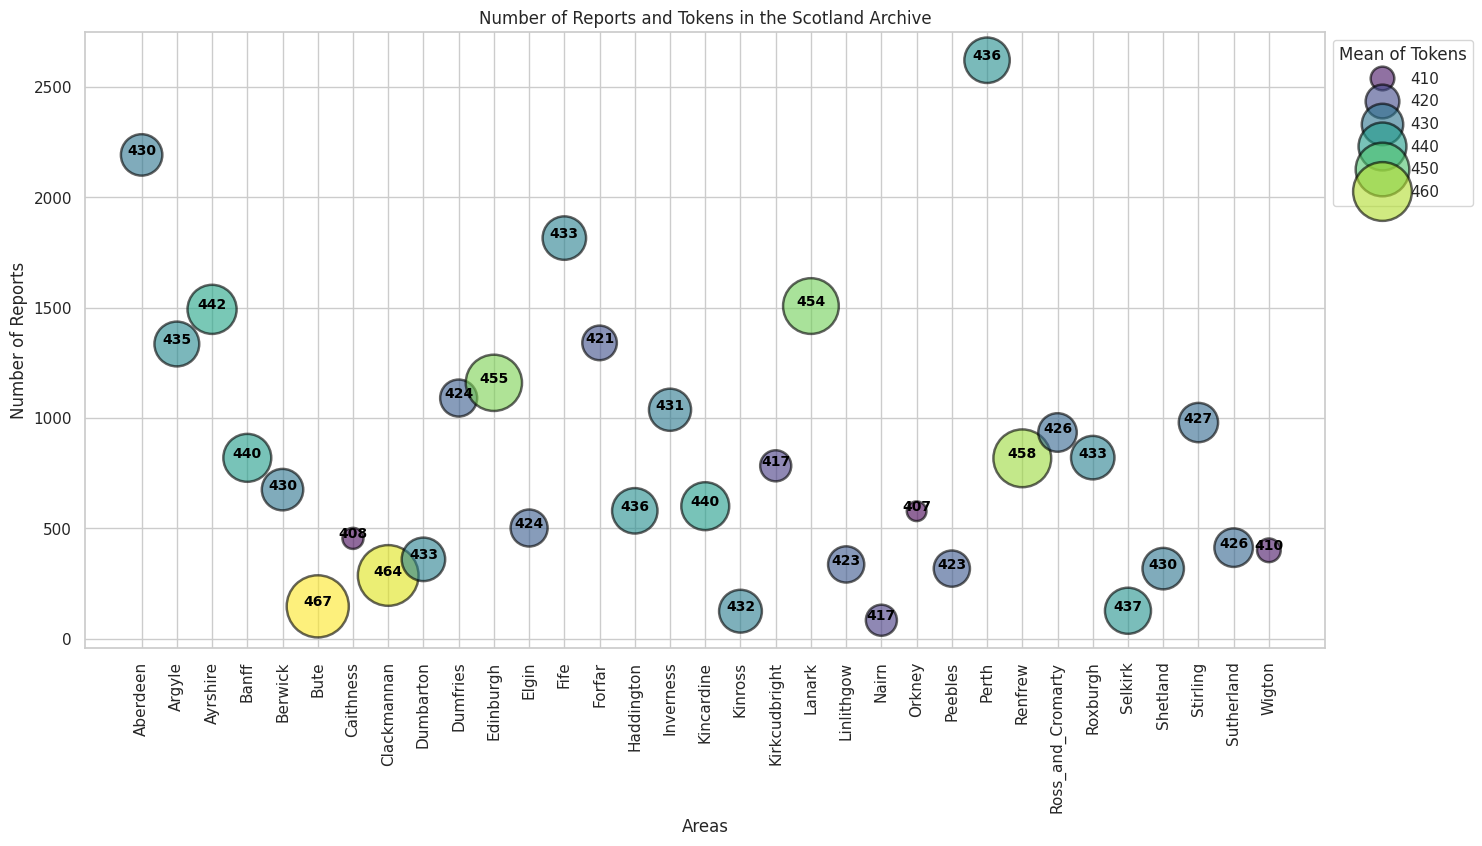

In [27]:
# Ensure that seaborn's aesthetics are used
sns.set_theme(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(16, 8))
scatter = sns.scatterplot(data=BreakoutScotland, x='Area', y='NReports', size='MeanTokens', hue='MeanTokens', palette='viridis', sizes=(200, 2000), alpha=0.6, edgecolor='black')

# Adding text labels for MeanTokens over the points
for line in range(0, BreakoutScotland.shape[0]):
     scatter.text(BreakoutScotland.Area[line], BreakoutScotland.NReports[line], BreakoutScotland.MeanTokens[line],
                 horizontalalignment='center', size='small', color='black', weight='semibold')

# Enhance aesthetics
plt.title('Number of Reports and Tokens in the Scotland Archive')
plt.xlabel('Areas')
plt.ylabel('Number of Reports')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.legend(title='Mean of Tokens', loc='upper left', bbox_to_anchor=(1,1))  # Move legend outside the plot
plt.show()

## Reflection time

What is this graph telling you about the texts we have in our corpus?

# Working on the Text

## Cleaning and Pre-processing


In [45]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import re
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize # Import the tokeniser by sentences
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [42]:
# if the beleow throw you an error because you do not have the Parish object anymore we can re-import it

# URL of the raw CSV file
#url = "https://raw.githubusercontent.com/DCS-training/StatAccountScotland/refs/heads/main/Parish.csv"

# Use pandas to read the CSV file directly from the URL
#Parish = pd.read_csv(url)
#Parish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27063 entries, 0 to 27062
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            27063 non-null  object
 1   text             27063 non-null  object
 2   Type             27063 non-null  object
 3   TypeDescriptive  27063 non-null  object
 4   RecordID         27063 non-null  object
 5   Area             27063 non-null  object
 6   Parish           27063 non-null  object
dtypes: object(7)
memory usage: 1.4+ MB


In [43]:
Parish['Wordtokens'] = Parish['text'].apply(lambda x: word_tokenize(x.lower()))
Parish.head()

,title,text,Type,TypeDescriptive,RecordID,Area,Parish,Wordtokens
0,StAS.1.6.459.P.Dumfries.Sanquhar,of sanquhar. miscellaneous observations.-the...,P,Parish,StAS.1.6.459,Dumfries,Sanquhar,"[of, sanquhar, ., miscellaneous, observations...."
1,StAS.2.14.257.P.Ross_and_Cromarty.Fodderty,fodderty. 257 t...,P,Parish,StAS.2.14.257,Ross_and_Cromarty,Fodderty,"[fodderty, ., 257, the, morals, of, the, peopl..."
2,StAS.1.3.263.P.Roxburgh.Makerston,"of makerston. parishes. about 50 years ago,...",P,Parish,StAS.1.3.263,Roxburgh,Makerston,"[of, makerston, ., parishes, ., about, 50, yea..."
3,StAS.2.12.245.P.Aberdeen.Belhelvie,belhelvie. 245 imp...,P,Parish,StAS.2.12.245,Aberdeen,Belhelvie,"[belhelvie, ., 245, improvements, in, agricult..."
4,StAS.2.5.401.P.Ayrshire.Girvan,girvan. 401 wheat and p...,P,Parish,StAS.2.5.401,Ayrshire,Girvan,"[girvan, ., 401, wheat, and, potatoes, for, up..."


In [46]:
# Tokenise by Sentences
Parish['Sentencetokens'] = Parish['text'].apply(lambda x: sent_tokenize(x.lower()))
Parish.head()

,title,text,Type,TypeDescriptive,RecordID,Area,Parish,Wordtokens,Sentencetokens
0,StAS.1.6.459.P.Dumfries.Sanquhar,of sanquhar. miscellaneous observations.-the...,P,Parish,StAS.1.6.459,Dumfries,Sanquhar,"[of, sanquhar, ., miscellaneous, observations....","[ of sanquhar., miscellaneous observations.-th..."
1,StAS.2.14.257.P.Ross_and_Cromarty.Fodderty,fodderty. 257 t...,P,Parish,StAS.2.14.257,Ross_and_Cromarty,Fodderty,"[fodderty, ., 257, the, morals, of, the, peopl...","[ fodderty., 257 the morals of the people hav..."
2,StAS.1.3.263.P.Roxburgh.Makerston,"of makerston. parishes. about 50 years ago,...",P,Parish,StAS.1.3.263,Roxburgh,Makerston,"[of, makerston, ., parishes, ., about, 50, yea...","[ of makerston., parishes., about 50 years ago..."
3,StAS.2.12.245.P.Aberdeen.Belhelvie,belhelvie. 245 imp...,P,Parish,StAS.2.12.245,Aberdeen,Belhelvie,"[belhelvie, ., 245, improvements, in, agricult...","[ belhelvie., 245 improvements in agriculture..."
4,StAS.2.5.401.P.Ayrshire.Girvan,girvan. 401 wheat and p...,P,Parish,StAS.2.5.401,Ayrshire,Girvan,"[girvan, ., 401, wheat, and, potatoes, for, up...","[ girvan., 401 wheat and potatoes for upwards..."


## Reflection time
What are the main differences between the two tokenisers? Can you think of a reason to use one or the other

Run the code below to look at the differences

In [47]:
print(Parish['Sentencetokens'].iloc[1])
len(Parish['Sentencetokens'].iloc[1])

[' fodderty.', '257  the morals of the people have, in several respects, undergone improvement.', 'in former times, cases of theft, especially, were by no means uncommon.', '* many superstitious notions still prevail among the common people.', 'they are firm believers in dreams and warnings-the taisq or wraith-and also in a kind of fairies or cursed spirits who resided in a small knoll directly opposite knockfarril; by whom children were often stolen or changed, before they were christened.', 'here, the old inhabitants say that, even in their day, unearthly music has been beard and unearthly lights seen ; but that the cursed spirits have been, long since, laid under a restraint which prevents them from making their appearance, or doing mischief as formerly.', 'there is a small spring which rises in a circular hollow in a solid rock on the west side of rhoagie, called tobar-nadomhnuich, the water of which is believed to possess the virtue of indicating whether a sick person shall surviv

25

In [48]:
print(Parish['Wordtokens'].iloc[1])
len(Parish['Wordtokens'].iloc[1])

['fodderty', '.', '257', 'the', 'morals', 'of', 'the', 'people', 'have', ',', 'in', 'several', 'respects', ',', 'undergone', 'improvement', '.', 'in', 'former', 'times', ',', 'cases', 'of', 'theft', ',', 'especially', ',', 'were', 'by', 'no', 'means', 'uncommon', '.', '*', 'many', 'superstitious', 'notions', 'still', 'prevail', 'among', 'the', 'common', 'people', '.', 'they', 'are', 'firm', 'believers', 'in', 'dreams', 'and', 'warnings-the', 'taisq', 'or', 'wraith-and', 'also', 'in', 'a', 'kind', 'of', 'fairies', 'or', 'cursed', 'spirits', 'who', 'resided', 'in', 'a', 'small', 'knoll', 'directly', 'opposite', 'knockfarril', ';', 'by', 'whom', 'children', 'were', 'often', 'stolen', 'or', 'changed', ',', 'before', 'they', 'were', 'christened', '.', 'here', ',', 'the', 'old', 'inhabitants', 'say', 'that', ',', 'even', 'in', 'their', 'day', ',', 'unearthly', 'music', 'has', 'been', 'beard', 'and', 'unearthly', 'lights', 'seen', ';', 'but', 'that', 'the', 'cursed', 'spirits', 'have', 'been'

677

For now let's work on the wordtokens. The tokeniser did a good job in finding our words but we can clean it a bit better still.

As usual the process is to create a function that does what we want and then apply it to our dataset

In [49]:
# Function to cleanse tokens
def clean_tokens(tokens):
    cleaned_tokens = []
    for token in tokens:
        # Remove any URLs found in the token
        token = re.sub(r'https?://\S+|www\.\S+', '', token)

        # Remove punctuation and symbols (except hyphens for special handling), and all digits
        token = re.sub(r'[^\w-]', '', token)

        # Split on hyphen and handle each part separately
        parts = token.split('-')
        for part in parts:
            # Now applying strip here to each individual part after all other processing
            part = part.strip()
            # Remove numbers from each part only after splitting and stripping
            part = re.sub(r'\d+', '', part)  # Remove all digits
            # Only add the part to the cleaned_tokens if it is not empty
            if part:
                cleaned_tokens.append(part)

    return cleaned_tokens

In [50]:
Parish['Wordtokens'] = Parish['Wordtokens'].apply(clean_tokens)

In [51]:
print(Parish['Wordtokens'].iloc[1])
len(Parish['Wordtokens'].iloc[1])

['fodderty', 'the', 'morals', 'of', 'the', 'people', 'have', 'in', 'several', 'respects', 'undergone', 'improvement', 'in', 'former', 'times', 'cases', 'of', 'theft', 'especially', 'were', 'by', 'no', 'means', 'uncommon', 'many', 'superstitious', 'notions', 'still', 'prevail', 'among', 'the', 'common', 'people', 'they', 'are', 'firm', 'believers', 'in', 'dreams', 'and', 'warnings', 'the', 'taisq', 'or', 'wraith', 'and', 'also', 'in', 'a', 'kind', 'of', 'fairies', 'or', 'cursed', 'spirits', 'who', 'resided', 'in', 'a', 'small', 'knoll', 'directly', 'opposite', 'knockfarril', 'by', 'whom', 'children', 'were', 'often', 'stolen', 'or', 'changed', 'before', 'they', 'were', 'christened', 'here', 'the', 'old', 'inhabitants', 'say', 'that', 'even', 'in', 'their', 'day', 'unearthly', 'music', 'has', 'been', 'beard', 'and', 'unearthly', 'lights', 'seen', 'but', 'that', 'the', 'cursed', 'spirits', 'have', 'been', 'long', 'since', 'laid', 'under', 'a', 'restraint', 'which', 'prevents', 'them', 'fr

594

## Stopword
Stop words are a set of commonly used words in a language. Examples of stop words in English are “a,” “the,” “is,” “are,” etc. Stop words are commonly used in Text Mining and Natural Language Processing (NLP) to eliminate words that are so widely used that they carry very little useful information.

There are two approaches to this: use the embedded remove stopword function or work on the lenght of our tokens

E.g. we can remove short words Remove tokens under 3 characters. (Shorter words won’t tell us much about our data, and because we removed punctuation, we want to get rid of the truncated contractions–e.g. I’m –>‘I’, ‘m’)

In [52]:
# Define a function to filter out tokens with fewer than 3 characters
def filter_tokens(tokens):
    return [token for token in tokens if len(token) >= 3]

In [53]:
# Apply this filter to the DataFrame's 'tokens' column
Parish['filtered_tokens'] = Parish['Wordtokens'].apply(filter_tokens)

In [ ]:
print(Parish['filtered_tokens'].iloc[1])

['edenkillie', 'open', 'combat', 'after', 'the', 'dreadful', 'slaughter', 'his', 'followers', 'the', 'engagement', 'above', 'alluded', 'had', 'recourse', 'ambuscade', 'and', 'stratagem', 'harass', 'the', 'besieging', 'party', 'and', 'supply', 'father', 'garrison', 'with', 'provision', 'length', 'the', 'plaze', 'his', 'concealment', 'was', 'discovered', 'which', 'was', 'deep', 'cavern', 'wild', 'narrow', 'glen', 'called', 'slaginnan', 'gallice', 'slohk', 'nan', 'cean', 'about', 'half', 'mile', 'from', 'the', 'castle', 'when', 'was', 'taken', 'surprise', 'and', 'murdered', 'his', 'head', 'was', 'then', 'cut', 'off', 'and', 'thrown', 'into', 'the', 'fortress', 'with', 'this', 'terrible', 'taunt', 'the', 'old', 'man', 'your', 'son', 'has', 'provided', 'you', 'with', 'meal', 'and', 'now', 'send', 'you', 'flesh', 'eat', 'with', 'bitter', 'morsel', 'indeed', 'said', 'the', 'veteran', 'warrior', 'took', 'kissed', 'and', 'wept', 'over', 'but', 'will', 'gnaw', 'the', 'last', 'bone', 'before', 's

In [54]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
# embedding both <3 character and stop words+
def filter_tokens(tokens):
    return [token for token in tokens if len(token) >= 3 and token not in stop_words]

In [56]:
# Apply this filter to the DataFrame's 'tokens' column
Parish['Wordtokens'] = Parish['Wordtokens'].apply(filter_tokens)

In [ ]:
print(Parish['Wordtokens'].iloc[1])

['edenkillie', 'open', 'combat', 'dreadful', 'slaughter', 'followers', 'engagement', 'alluded', 'recourse', 'ambuscade', 'stratagem', 'harass', 'besieging', 'party', 'supply', 'father', 'garrison', 'provision', 'length', 'plaze', 'concealment', 'discovered', 'deep', 'cavern', 'wild', 'narrow', 'glen', 'called', 'slaginnan', 'gallice', 'slohk', 'nan', 'cean', 'half', 'mile', 'castle', 'taken', 'surprise', 'murdered', 'head', 'cut', 'thrown', 'fortress', 'terrible', 'taunt', 'old', 'man', 'son', 'provided', 'meal', 'send', 'flesh', 'eat', 'bitter', 'morsel', 'indeed', 'said', 'veteran', 'warrior', 'took', 'kissed', 'wept', 'gnaw', 'last', 'bone', 'surrender', 'castle', 'estate', 'dunphail', 'time', 'afterwards', 'became', 'property', 'dunbar', 'belongs', 'cumming', 'bruce', 'doune', 'hill', 'relugas', 'described', 'last', 'statistical', 'account', 'follows', 'seems', 'fortress', 'still', 'greater', 'antiquity', 'viz', 'castle', 'lochindorb', 'used', 'far', 'beyond', 'period', 'authentic'

## Reflection time

Can you think to possible downsides of removing the stop words?


The last thing we are going to have a look at is how to remove a custom list of words that we do not want to have in our tokens because too popular

In [57]:
custom_stopwords = ['statistical', 'account', 'parish','one', 'year', 'years']

In [58]:
def filter_custom_tokens(tokens, custom_stopwords):
    custom_stopwords_set = set(custom_stopwords)  # Convert list to set for faster lookup
    return [token for token in tokens if token not in custom_stopwords_set]


In [59]:
# Apply this filter to the DataFrame's 'tokens' column
Parish['Wordtokens'] = Parish['Wordtokens'].apply(lambda tokens: filter_custom_tokens(tokens, custom_stopwords))

In [60]:
print(Parish['Wordtokens'].iloc[0])

['sanquhar', 'miscellaneous', 'observations', 'people', 'sanquhar', 'enjoy', 'competent', 'nature', 'advantages', 'life', 'plenof', 'coal', 'fine', 'springs', 'water', 'lime', 'species', 'coarse', 'marble', 'sea', 'stone', 'quarries', 'excellent', 'purposes', 'building', 'sum', 'twice', 'buying', 'selling', 'black', 'cattle', 'market', 'butcher', 'meat', 'throughout', 'post', 'office', 'sanquhar', 'annual', 'revenue', 'fulling', 'corn', 'two', 'barley', 'mills', 'chief', 'disadvantage', 'perhaps', 'residence', 'principal', 'honour', 'whole', 'except', 'estate', 'lithoch', 'naked', 'uninclosed', 'hillrock', 'fine', 'natural', 'wood', 'fringes', 'adorns', 'banks', 'nith', 'two', 'miles', 'length', 'present', 'respectable', 'proprietor', 'estate', 'also', 'planted', 'good', 'deal', 'various', 'kinds', 'wood', 'scotch', 'larix', 'silver', 'fir', 'new', 'england', 'pine', 'banks', 'gilead', 'fir', 'oak', 'elm', 'birch', 'beech', 'ash', 'mountain', 'ash', 'etc', 'well', 'inclosed', 'thriving

Ok we are going to look now a last 'cleaning' step we can perform: the lemmatisation and stemmatisation. AS for the stopwords these need to be use with care cause they can alter the meaning of words.

In [61]:
# First the stemming
from nltk.stem import PorterStemmer

# Creating the stemmer
stemmer = PorterStemmer()

In [65]:
Parish['StemmingToken'] = Parish['Wordtokens'].apply(lambda x: [stemmer.stem(token) for token in x])

In [67]:
Parish.iloc[0:10,[7,10]]

,Wordtokens,StemmingToken
0,"[sanquhar, miscellaneous, observations, people...","[sanquhar, miscellan, observ, peopl, sanquhar,..."
1,"[fodderty, morals, people, several, respects, ...","[fodderti, moral, peopl, sever, respect, under..."
2,"[makerston, parishes, ago, small, farmers, vil...","[makerston, parish, ago, small, farmer, villag..."
3,"[belhelvie, improvements, agriculture, agricul...","[belhelvi, improv, agricultur, agricultur, ind..."
4,"[girvan, wheat, potatoes, upwards, twenty, how...","[girvan, wheat, potato, upward, twenti, howev,..."
5,"[lismore, appin, sea, coasts, currents, etc, v...","[lismor, appin, sea, coast, current, etc, vast..."
6,"[rothiemay, common, labour, delving, without, ...","[rothiemay, common, labour, delv, without, vic..."
7,"[perth, bid, cut, cow, lug, mix, blood, draff,...","[perth, bid, cut, cow, lug, mix, blood, draff,..."
8,"[number, xxxiii, edderachylis, presbytery, ton...","[number, xxxiii, edderachyli, presbyteri, tong..."
9,"[monly, granted, lord, galloway, two, upon, es...","[monli, grant, lord, galloway, two, upon, esta..."


In [68]:
from nltk.stem import WordNetLemmatizer
# Downloading necessary resources from NLTK
nltk.download('wordnet')
nltk.download('omw-1.4')
# Creating the lemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [69]:
Parish['LemmTokens'] = Parish['Wordtokens'].apply(lambda x: [lemmatizer.lemmatize(token, pos='v') for token in x])#For better lemmatization, especially for verbs, you can specify the part-of-speech (POS):

In [70]:
Parish.iloc[10:20,[7,10,11]]

,Wordtokens,StemmingToken,LemmTokens
10,"[aberdeenshire, streets, watchmen, employed, p...","[aberdeenshir, street, watchmen, employ, patro...","[aberdeenshire, streets, watchmen, employ, pat..."
11,"[aberdeenshire, thomas, nory, sheriff, aberdee...","[aberdeenshir, thoma, nori, sheriff, aberdeen,...","[aberdeenshire, thomas, nory, sheriff, aberdee..."
12,"[renfrewshire, moss, capable, improved, great,...","[renfrewshir, moss, capabl, improv, great, fac...","[renfrewshire, moss, capable, improve, great, ..."
13,"[bove, deep, remarkable, never, freezes, winte...","[bove, deep, remark, never, freez, winter, rea...","[bove, deep, remarkable, never, freeze, winter..."
14,"[bedrule, sterling, twenty, acres, planted, po...","[bedrul, sterl, twenti, acr, plant, potato, pr...","[bedrule, sterling, twenty, acres, plant, pota..."
15,"[difficulty, procuring, remedy, growing, evil,...","[difficulti, procur, remedi, grow, evil, potte...","[difficulty, procure, remedy, grow, evil, pott..."
16,"[progress, civilization, worth, observing, cha...","[progress, civil, worth, observ, chang, mode, ...","[progress, civilization, worth, observe, chang..."
17,"[aberdeen, associate, synod, originat, seceder...","[aberdeen, associ, synod, originat, seced, muc...","[aberdeen, associate, synod, originat, seceder..."
18,"[remains, encampments, ruins, castles, vestige...","[remain, encamp, ruin, castl, vestig, tomb, ap...","[remain, encampments, ruin, castle, vestiges, ..."
19,"[ross, cromarty, rish, benefit, poor, present,...","[ross, cromarti, rish, benefit, poor, present,...","[ross, cromarty, rish, benefit, poor, present,..."


## Reflection time

Can you tell the difference between the different strategies?
What do you think are the pro and con?

# Analysis

After all this cleaning let's start having a look of what kind of analysis we can perform

In [71]:
from nltk.probability import FreqDist

In [72]:
Tokens= Parish['Wordtokens'].tolist()
# Flatten the list of lists 'Tokens'
flat_tokens = [token for sublist in Tokens for token in sublist]

In [73]:
fdist = FreqDist(flat_tokens)
print(fdist)

<FreqDist with 132623 samples and 4697485 outcomes>


**Samples**: Refers to the unique tokens (or items) that were counted by FreqDist. In your case, "132623 samples" means there are 132,623 unique words or tokens in the dataset you analyzed.

**Outcomes**: Refers to the total number of tokens (or events, items, etc.) that were processed — essentially, the total count of all occurrences of all tokens in the data. "4697485 outcomes" indicates that, summing the counts of all individual tokens, there were 4,697,485 tokens processed in total

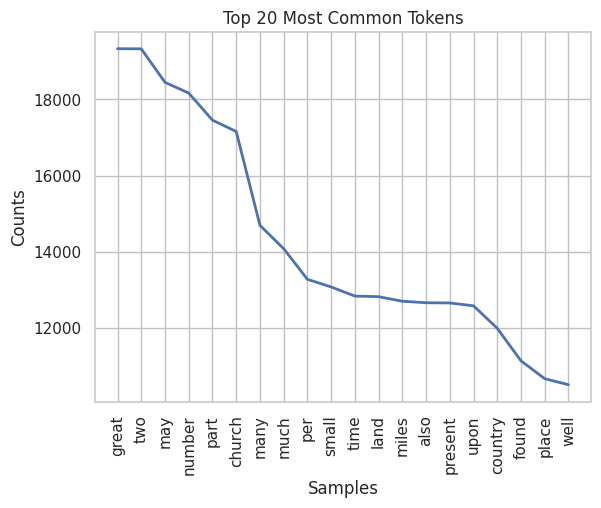

In [74]:
# Plot the top 20 most common tokens
fdist.plot(20, title='Top 20 Most Common Tokens')
plt.show()

In [ ]:
#!pip install wordcloud
# uncomment in case the next line throws you an error

In [75]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [76]:
# Convert FreqDist to a dictionary for word cloud generation
freq_dict = dict(fdist)

(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

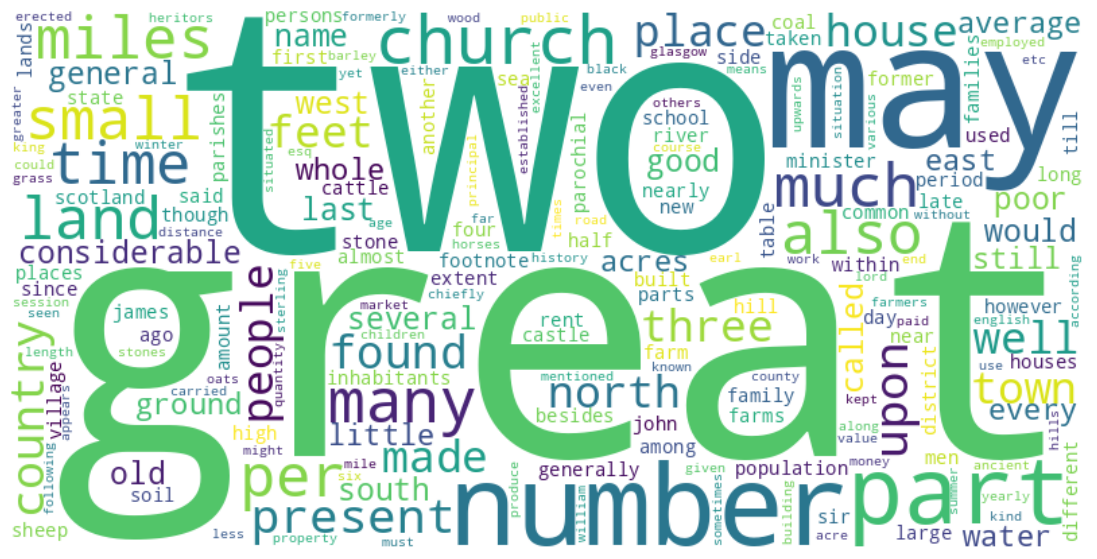

In [77]:
# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dict)

# Display the word cloud
fig, ax = plt.subplots(figsize=(14, 7))  # Define the figure
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')  # Turn off axis

In [78]:
# Save the figure to a file
fig.savefig('wordcloud.jpg', format='jpeg')

Ok this is on the full dataset but it would probably more interesting to compare two areas on the dataset e.g one very city-like and one very remote



In [79]:
print(Parish['Area'].unique())

['Dumfries' 'Ross_and_Cromarty' 'Roxburgh' 'Aberdeen' 'Ayrshire' 'Argyle'
 'Banff' 'Perth' 'Sutherland' 'Wigton' 'Renfrew' 'Inverness' 'Lanark'
 'Edinburgh' 'Berwick' 'Fife' 'Caithness' 'Kincardine' 'Kinross' 'Selkirk'
 'Stirling' 'Forfar' 'Orkney' 'Peebles' 'Elgin' 'Linlithgow' 'Haddington'
 'Clackmannan' 'Kirkcudbright' 'Nairn' 'Dumbarton' 'Shetland' 'Bute']


In [80]:
# Subsetting data for Edinburgh
edinburgh_tokens = Parish[Parish['Area'] == 'Edinburgh']['Wordtokens'].explode().tolist()

# Subsetting data for Fife
fife_tokens = Parish[Parish['Area'] == 'Fife']['Wordtokens'].explode().tolist()

In [81]:
# Generate frequency distributions
freq_dist_edinburgh = FreqDist(edinburgh_tokens)
freq_dist_fife = FreqDist(fife_tokens)

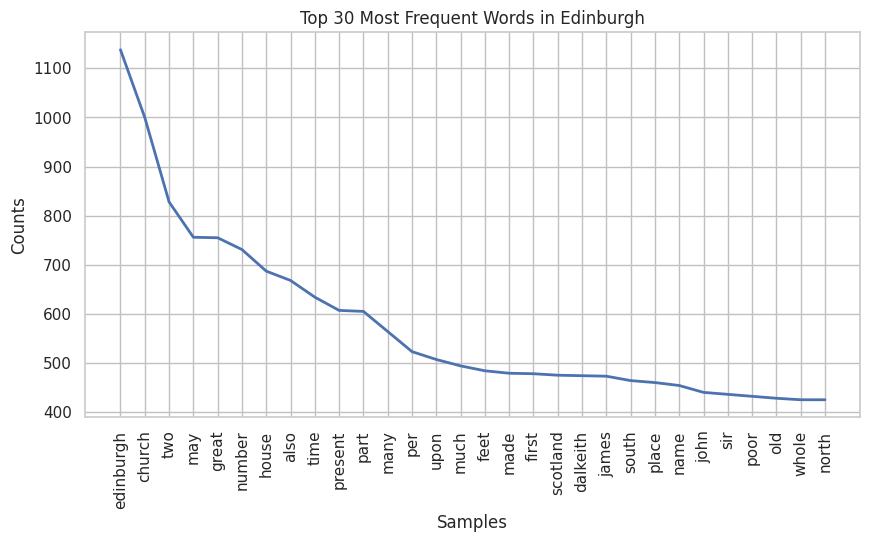

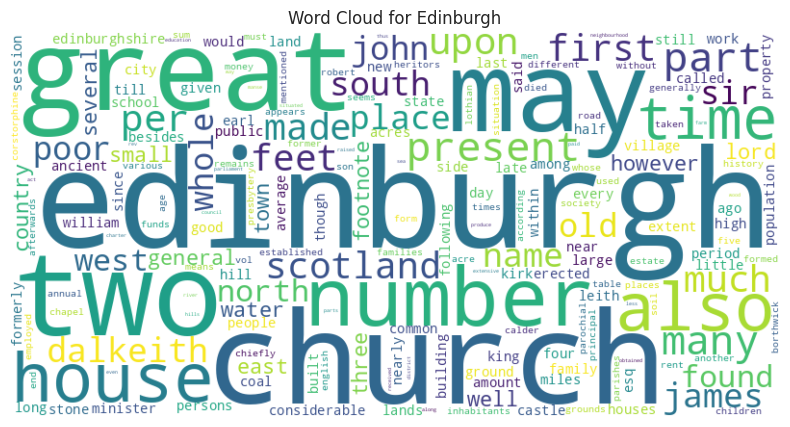

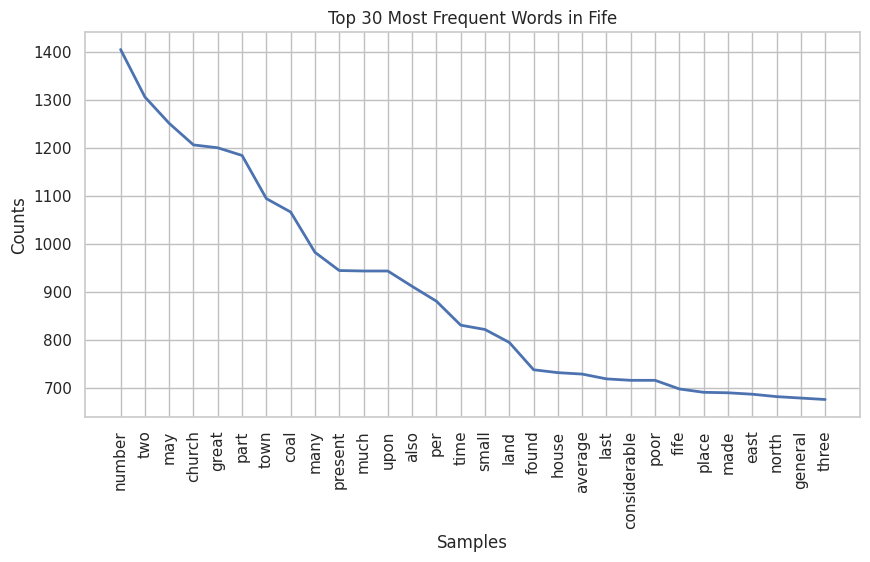

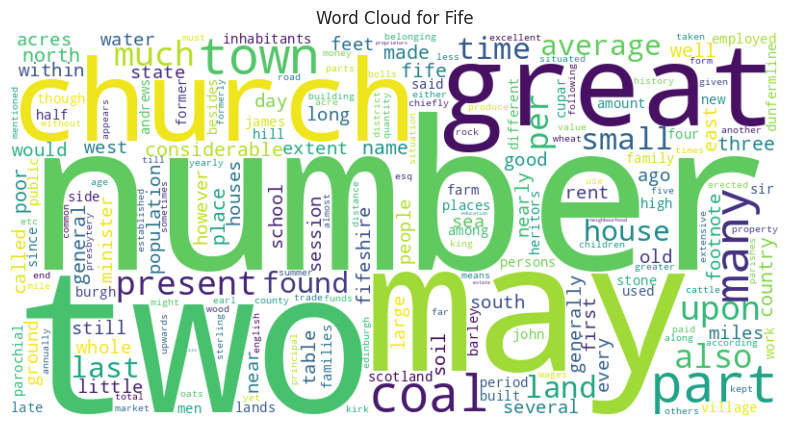

In [82]:
# to avoid having to repeat the steps multiple time we can create a function that will contain the specificsof creating and saving the visualisations

def create_plots(freq_dist, area_name):
    # Creating the frequency plot
    plt.figure(figsize=(10, 5))
    freq_dist.plot(30, title=f'Top 30 Most Frequent Words in {area_name}')
    plt.savefig(f'freq_plot_{area_name.lower()}.jpg')  # Save the frequency plot as a JPEG

    # Creating the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {area_name}')
    plt.savefig(f'wordcloud_{area_name.lower()}.jpg')  # Save the word cloud as a JPEG

# Create and save plots for Edinburgh
create_plots(freq_dist_edinburgh, 'Edinburgh')

# Create and save plots for Fife
create_plots(freq_dist_fife, 'Fife')

Can you see any big difference? Why do you think you are getting quite different results?

## Exercise

Try repeat the steps above for a different couple of areas.

**Tip:** we can reuse the function we created to create the graph

In [83]:
# enter your code below

# Subsetting data for an area
_tokens = Parish[Parish['Area'] == '_']['Wordtokens'].explode().tolist()


# Keywords in Contex



In [84]:
from nltk.text import Text

In [86]:
# Transforming the total of the token into a Text object
text_content = Text(flat_tokens)

text_content.concordance('intemperance', lines=100)

Displaying 100 of 126 matches:
tant towns inns two inns sources intemperance ecclesiastical state stipend dun
g amusement prostituted purposes intemperance made pretensions superior virtue
bath religious ordinances habits intemperance increasing among lower orders ma
 veracity respect law propensity intemperance fraud pilfering superabundance s
ober industrious strangers alike intemperance dissipation every kind vice dram
cation perthshire trace increase intemperance increased facilities indulgence 
d would achieved way suppressino intemperance mere human means yet suggested s
ilities thus afforded indulgence intemperance must aggravate evil fuel abundan
ated raw recruit spend immediate intemperance money often injudiciously lent v
elancholy proof declining morals intemperance chiefly pawnbroking owes growth 
r wife plea necessity frequently intemperance wife consumes large portion hard
y large towa britain consequence intemperance husband wife practice pawning co
lsewhere root degrada

In [93]:
# Make sure punkt is loaded
nltk.download('punkt')

# Fetching concordance lines which you can analyze or extract text from
concordance_lines = text_content.concordance_list("intemperance")

# Correctly extracting and concatenating text from each ConcordanceLine object
# Skipping the keyword itself as specified
contexts = [' '.join(line.left + line.right) for line in concordance_lines]

# Tokenize each context
tokenized_contexts = [word_tokenize(context) for context in contexts]

[['bearing', 'smaller', 'proportion', 'former', 'character', 'people', 'appear', 'improved', 'contrary', 'great', 'number', 'young', 'persons', 'growing', 'regardless', 'sabbath', 'religious', 'ordinances', 'habits', 'increasing', 'among', 'lower', 'orders', 'may', 'traced', 'part', 'increase', 'population', 'without', 'corresponding', 'augmentation', 'provision', 'made', 'pastoral', 'instruction', 'decay', 'parental'], ['malt', 'spirits', 'carried', 'great', 'extent', 'thornhill', 'act', 'restricting', 'stills', 'large', 'capacity', 'passed', 'still', 'discernible', 'want', 'veracity', 'respect', 'law', 'propensity', 'fraud', 'pilfering', 'superabundance', 'spirituous', 'liquors', 'habits', 'defrauding', 'government', 'strong', 'tendency', 'producethe', 'present', 'law', 'respecting', 'distillery', 'establishing', 'composition', 'excite'], ['whole', 'county', 'men', 'getting', 'thw', 'women', 'per', 'annum', 'provisions', 'peebles', 'essie', 'nevay', 'character', 'inhabitants', 'terri

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [98]:
print(tokenized_contexts[:2])
#this is still nested so we need to flat it

[['used', 'coal', 'may', 'found', 'seaborne', 'either', 'adjacent', 'towns', 'mentioned', 'coal', 'mines', 'interior', 'country', 'distant', 'towns', 'inns', 'two', 'inns', 'sources', 'ecclesiastical', 'state', 'stipend', 'dunin', 'augmented', 'fort', 'two', 'yearsago', 'brown', 'incumbent', 'received', 'considerable', 'addition', 'former', 'present', 'minister', 'received', 'also'], ['perfect', 'consistency', 'creed', 'gloried', 'open', 'desecration', 'lord', 'day', 'said', 'followed', 'ordinary', 'occupations', 'sabbath', 'others', 'spent', 'seeking', 'amusement', 'prostituted', 'purposes', 'made', 'pretensions', 'superior', 'virtue', 'disregarded', 'ordinary', 'forms', 'decencies', 'civilized', 'life', 'six', 'individuals', 'died', 'establishment', 'interred', 'private', 'burying', 'ground']]


In [99]:
flat_tokens_intemperance = [token for sublist in tokenized_contexts for token in sublist]

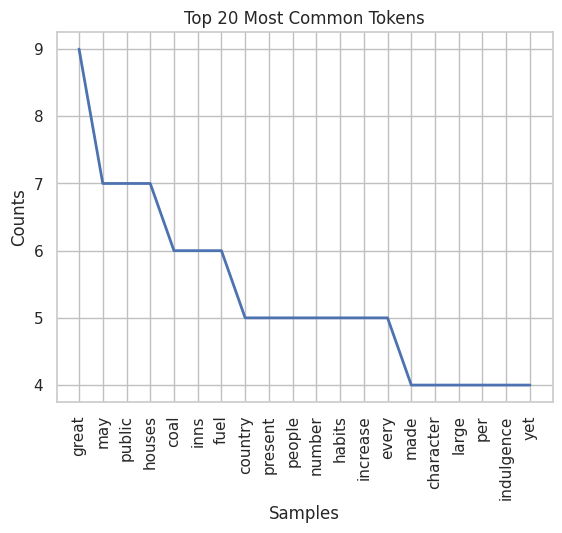

In [100]:
freq_dist = FreqDist(flat_tokens_intemperance)
# Plot the top 20 most common tokens
freq_dist.plot(20, title='Top 20 Most Common Tokens near intemperance')
plt.show()

We can also check similar token in context. Using similar(token) returns a list of words that appear in the same context as token. In this case the the context is just the words directly on either side of token

In [109]:
text_content.concordance('church', lines=20)

Displaying 20 of 17159 matches:
 webster report number souls stated church value living including glebe may vi
r find better least adequate reward church school etc church built ago commodi
t adequate reward church school etc church built ago commodious well lighted e
state life farmers size farms acres church stipend church completely repaired 
ers size farms acres church stipend church completely repaired ago manse rebui
ed among chiefly raised collections church legal manner treating paupers adopt
ly sworn obedience future patronage church fvvie course belonged abbey arbroat
advocation donation right patronage church since time patronage gone fyvie pro
ckvatyr spouse connection cathedral church aberdeen endowed lands folethrowle 
ties chapels connected doubt either church priory vestiges still seen farm eas
s remain chaplainry ninian nicholas church aberdeen connected fyvie endowment 
addition inconsiderable perquisites church dunlichty rebuilt repair since ago 
 dunlichty rebuilt r

In [110]:
text_content.similar("church")

manse town house present village west kirk time school chapel part
castle side old north building built poor country two


common_contexts that shows when the use of a list of words share the same surrounding words

In [111]:
text_content.common_contexts(['church', 'town'])

present_built new_built established_two old_built present_stands
time_built old_called near_built old_situated near_manse new_old
near_situated established_including end_manse part_stands state_etc
situation_upon eminence_stands established_many old_new


## Reflection time
What do you think we are seeing here?

## Dispersion Plot
We can also look how specific keywords we are interested in can be found across our text

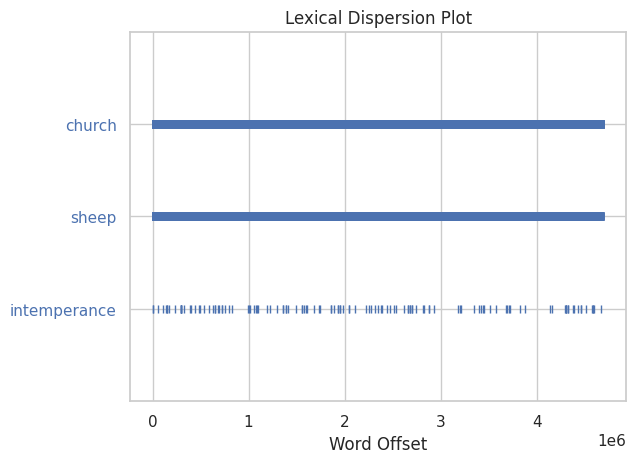

In [113]:
text_content.dispersion_plot(["church", "sheep", "intemperance"])

Try to search other keywords that you think will be very present in our dataset

When we talk about the context of words (or tokens!) in text analysis, we're referring to the surrounding words of a given word. Concordances show a bit of context to the left of an input word (just before the word appears) and to the right of that word (just after that word appeared).

We can use the similar method to see words that appear in similar contexts, meaning they're surrounded by similar tokens, as the token we input.

Pairs of words that occur together, such as "good" and "opinion," are referred to as **bigrams**, where "bi" indicates two. **N-grams** are groups of words that occur together, where n is a number of your choice.

To get all the bigrams in a text, we can use the bigrams() method, into which we pass the variable referring to the text itself.

In [115]:
bigrams_list = list(nltk.bigrams(text_content))
print(bigrams_list[:30])

[('sanquhar', 'miscellaneous'), ('miscellaneous', 'observations'), ('observations', 'people'), ('people', 'sanquhar'), ('sanquhar', 'enjoy'), ('enjoy', 'competent'), ('competent', 'nature'), ('nature', 'advantages'), ('advantages', 'life'), ('life', 'plenof'), ('plenof', 'coal'), ('coal', 'fine'), ('fine', 'springs'), ('springs', 'water'), ('water', 'lime'), ('lime', 'species'), ('species', 'coarse'), ('coarse', 'marble'), ('marble', 'sea'), ('sea', 'stone'), ('stone', 'quarries'), ('quarries', 'excellent'), ('excellent', 'purposes'), ('purposes', 'building'), ('building', 'sum'), ('sum', 'twice'), ('twice', 'buying'), ('buying', 'selling'), ('selling', 'black'), ('black', 'cattle')]


In [116]:
trigrams_list = list(nltk.trigrams(text_content))
print(trigrams_list[:30])

[('sanquhar', 'miscellaneous', 'observations'), ('miscellaneous', 'observations', 'people'), ('observations', 'people', 'sanquhar'), ('people', 'sanquhar', 'enjoy'), ('sanquhar', 'enjoy', 'competent'), ('enjoy', 'competent', 'nature'), ('competent', 'nature', 'advantages'), ('nature', 'advantages', 'life'), ('advantages', 'life', 'plenof'), ('life', 'plenof', 'coal'), ('plenof', 'coal', 'fine'), ('coal', 'fine', 'springs'), ('fine', 'springs', 'water'), ('springs', 'water', 'lime'), ('water', 'lime', 'species'), ('lime', 'species', 'coarse'), ('species', 'coarse', 'marble'), ('coarse', 'marble', 'sea'), ('marble', 'sea', 'stone'), ('sea', 'stone', 'quarries'), ('stone', 'quarries', 'excellent'), ('quarries', 'excellent', 'purposes'), ('excellent', 'purposes', 'building'), ('purposes', 'building', 'sum'), ('building', 'sum', 'twice'), ('sum', 'twice', 'buying'), ('twice', 'buying', 'selling'), ('buying', 'selling', 'black'), ('selling', 'black', 'cattle'), ('black', 'cattle', 'market')]

# Working with Geographical Data
This is the last topic we are going to have a look.

Our dataset contains geographical information so we can also analyse our data based on their geographical location.
To do so we need a geographical file, in our case a geopackage file, (basically a vectorial file representing each area of Scotland). This file has been compiled in a way to match the areas in our dataset with the areas of historical parishes.

In [ ]:
#! pip install geopandas

In [117]:
import geopandas as gpd
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt

In [118]:
# import hte .gpkg file

# Adjust the path to where your GeoPackage file is located
ParishesGeo = gpd.read_file("StatAccountScotland/Spatial/Parishes.gpkg", layer='civilparish_pre1891')

Let's say that we want to focus on the mentions of ilness in our dataset.
First we need to search all mention of our ilness-related keyword and create a new column in our dataset that would print either yes or no if one of our keyword is present

In [ ]:
# if the beleow throw you an error because you do not have the Parish object anymore we can re-import it

# URL of the raw CSV file
#url = "https://raw.githubusercontent.com/DCS-training/StatAccountScotland/refs/heads/main/Parish.csv"

# Use pandas to read the CSV file directly from the URL
#Parish = pd.read_csv(url)
#Parish.info()

In [119]:
# Check for keywords and add them to a new column
Parish['Illness'] = np.where(Parish['text'].str.contains('ill|illness|sick|cholera', case=False, regex=True), "yes", "no")

# Aggregate data by Area - Group by the Illness column and geographical area
IllnessGroup = Parish.groupby('Area').agg(
    Total=('Illness', 'size'),
    Count=('Illness', lambda x: np.sum(x == 'yes'))
).reset_index()
IllnessGroup['Percentage'] = round(IllnessGroup['Count'] / IllnessGroup['Total'], 2)

In [120]:
# Perform the merge - ensuring similar keys are used for merging
MergedIlness = ParishesGeo.merge(IllnessGroup, left_on='JOIN_NAME_', right_on='Area', how='left')


In [123]:
# Create a color map
color_palette = LinearSegmentedColormap.from_list("my_palette", ["white", "red"])

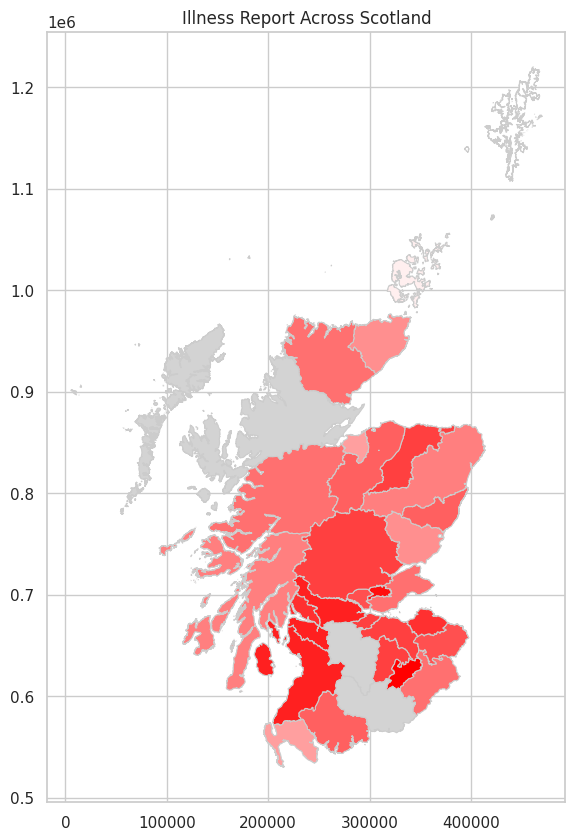

In [124]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
MergedIlness.plot(column='Percentage', cmap=color_palette, linewidth=0.8,
               ax=ax, edgecolor='0.8', missing_kwds={'color': 'lightgrey'})
ax.title.set_text('Illness Report Across Scotland')
plt.show()

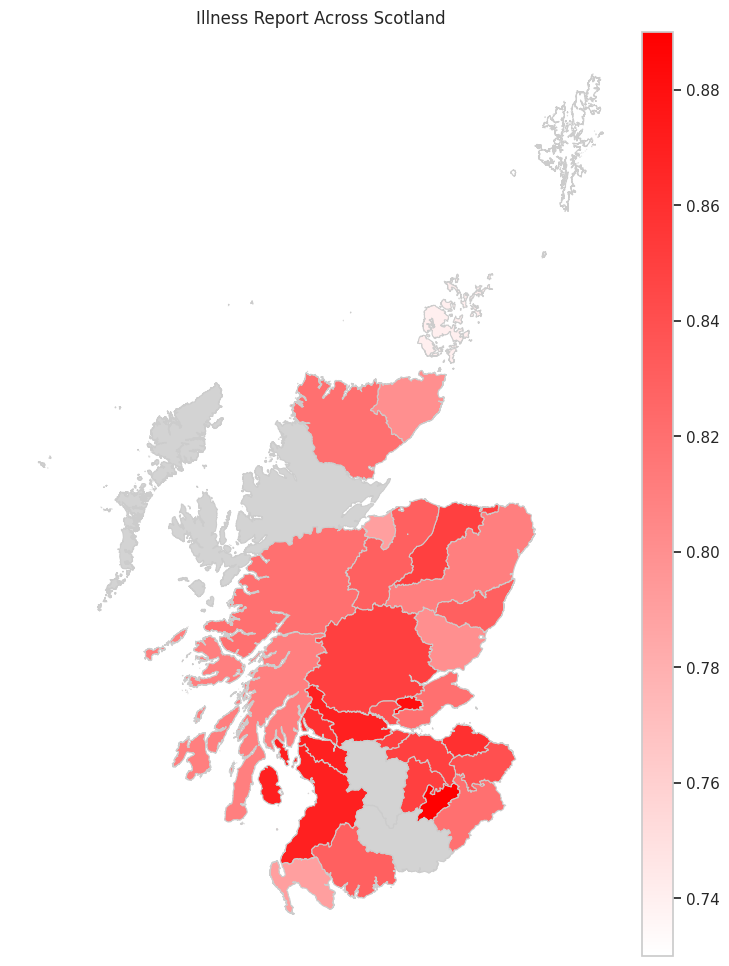

In [126]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

MergedIlness.plot(column='Percentage', cmap=color_palette, linewidth=0.8,
               ax=ax, edgecolor='0.8', missing_kwds={
                   'color': 'lightgrey',
                   'label': 'No data'
               },
               legend=True, cax=cax)

ax.title.set_text('Illness Report Across Scotland')
ax.set_axis_off()  # Optionally turn off the axis.
plt.show()


In [127]:
# Let's now search for witches
# Check for keywords and add them to a new column
Parish['Witchcraft'] = np.where(Parish['text'].str.contains('witch|spell|witches|enchantemt|magic|witchcraft', case=False, regex=True), "yes", "no")

# Aggregate data by Area - Group by the 'Witchcraft column and geographical area
WitchcraftGroup = Parish.groupby('Area').agg(
    Total=('Witchcraft', 'size'),
    Count=('Witchcraft', lambda x: np.sum(x == 'yes'))
).reset_index()
WitchcraftGroup['Percentage'] = round(WitchcraftGroup['Count'] / WitchcraftGroup['Total'], 2)

In [130]:
# Perform the merge - ensuring similar keys are used for merging
MergedWitches = ParishesGeo.merge(WitchcraftGroup , left_on='JOIN_NAME_', right_on='Area', how='left')

In [128]:
# Create a color map
color_palette = LinearSegmentedColormap.from_list("my_palette", ["white", "purple"])

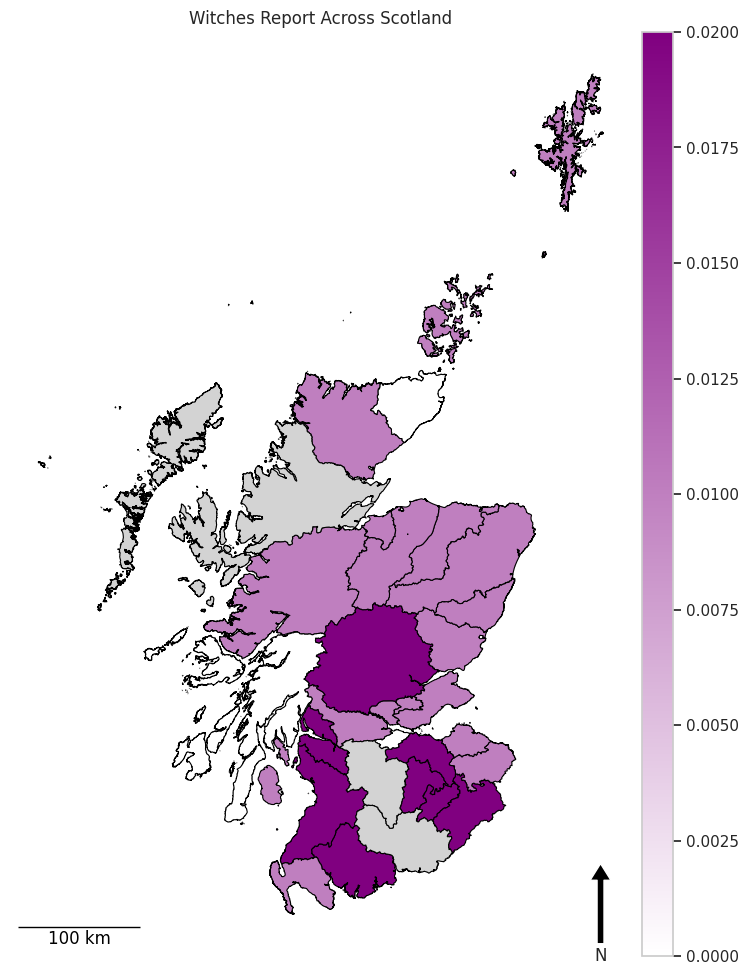

In [142]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

# Assuming 'MergedWitches' is prepared and ready to plot
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

MergedWitches.plot(
    column='Percentage',
    cmap=color_palette,
    linewidth=0.8,
    ax=ax,
    edgecolor='black',
    legend=True,
    cax=cax,
    missing_kwds={
        'color': 'lightgrey',
        'label': 'No data'
    }
)

ax.set_title('Witches Report Across Scotland')
ax.set_axis_off()

# Add scale bar
scalebar = AnchoredSizeBar(ax.transData,
                           100000, '100 km', 'lower left',
                           pad=0.4,
                           color='black',
                           frameon=False,
                           size_vertical=4,
                           fontproperties=fm.FontProperties(size=12))
ax.add_artist(scalebar)

# Add North Arrow
x, y, arrow_length = 0.95, 0.1, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=12, xycoords=ax.transAxes)

plt.show()


to see how to plot together multiple informations let's finally look at whisky consumption.

In [143]:
# Let's now search for wisky mentions
# Check for keywords and add them to a new column
Parish['Wisky'] = np.where(Parish['text'].str.contains('illicit still|illicit distillery|drunk|intemperance|wisky|whisky|whiskey|whysky|alembic', case=False, regex=True), "yes", "no")

# Aggregate data by Area - Group by the 'Wisky column and geographical area
WiskyGroup = Parish.groupby('Area').agg(
    Total=('Wisky', 'size'),
    Count=('Wisky', lambda x: np.sum(x == 'yes'))
).reset_index()
WiskyGroup['Percentage'] = round(WiskyGroup['Count'] / WiskyGroup['Total'], 2)

In [145]:
# Perform the merge - ensuring similar keys are used for merging
MergedWisky = ParishesGeo.merge(WiskyGroup , left_on='JOIN_NAME_', right_on='Area', how='left')

In [146]:
# Create a color map
color_palette = LinearSegmentedColormap.from_list("my_palette", ["white", "brown"])

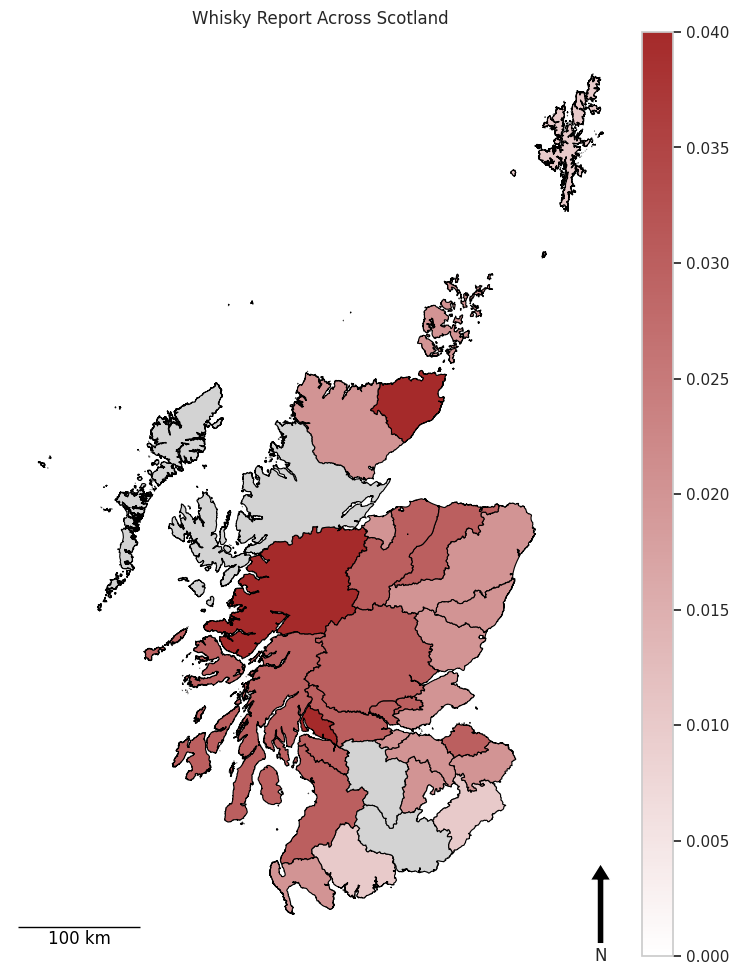

In [147]:
# Plot it
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

MergedWisky.plot(
    column='Percentage',
    cmap=color_palette,
    linewidth=0.8,
    ax=ax,
    edgecolor='black',
    legend=True,
    cax=cax,
    missing_kwds={
        'color': 'lightgrey',
        'label': 'No data'
    }
)

ax.set_title('Whisky Report Across Scotland')
ax.set_axis_off()

# Add scale bar
scalebar = AnchoredSizeBar(ax.transData,
                           100000, '100 km', 'lower left',
                           pad=0.4,
                           color='black',
                           frameon=False,
                           size_vertical=4,
                           fontproperties=fm.FontProperties(size=12))
ax.add_artist(scalebar)

# Add North Arrow
x, y, arrow_length = 0.95, 0.1, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=12, xycoords=ax.transAxes)

plt.show()

In [148]:
# Import the location of modern day distilleries
PointsDistilleries = gpd.read_file("StatAccountScotland/Spatial/ScottishDistilleries.gpkg")

In [154]:
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox # Import necessary classes

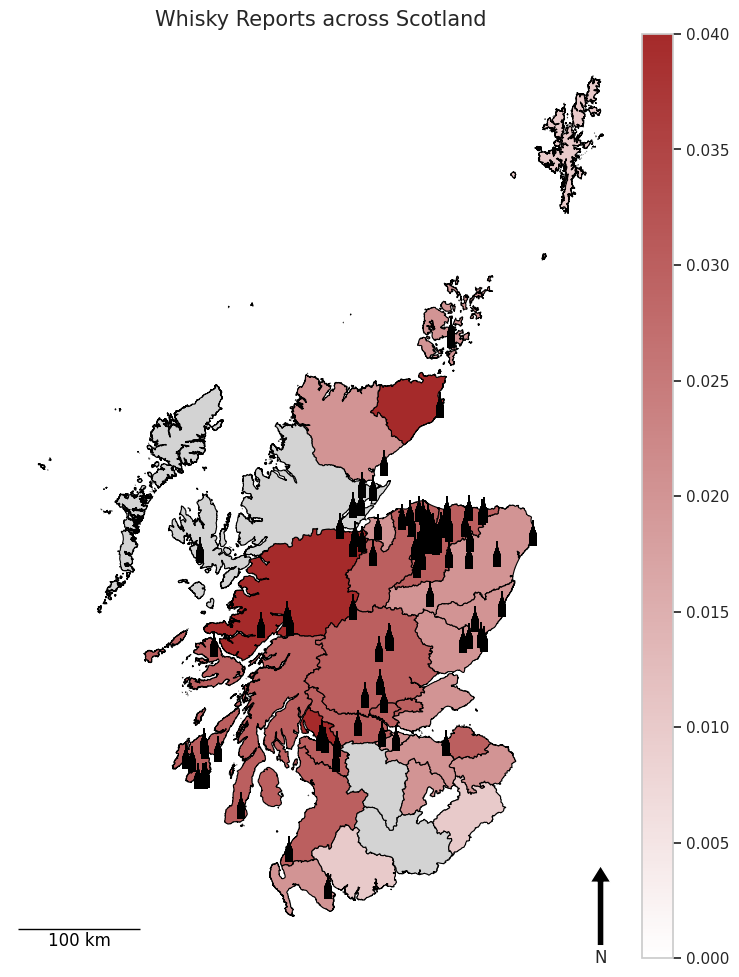

In [156]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Plot area data
MergedWisky.plot(
    column='Percentage',
    cmap=color_palette,
    linewidth=0.8,
    ax=ax,
    edgecolor='black',
    legend=True,
    cax=cax,
    missing_kwds={
        'color': 'lightgrey',
        'label': 'No data'
    }
)

# Handling points with custom icons
img = Image.open("StatAccountScotland/Spatial/bottle.png")
img = np.array(img)
imagebox = OffsetImage(img, zoom=0.1)  # Adjust zoom as necessary

for x, y in zip(PointsDistilleries.geometry.x, PointsDistilleries.geometry.y):
    ab = AnnotationBbox(imagebox, (x, y), frameon=False, pad=0.1, box_alignment=(0.5, 0.5))
    ax.add_artist(ab)



ax.set_title("Whisky Reports across Scotland", fontsize=15)

# Add scale bar
scalebar = AnchoredSizeBar(ax.transData,
                           100000, '100 km', 'lower left',
                           pad=0.4,
                           color='black',
                           frameon=False,
                           size_vertical=4,
                           fontproperties=fm.FontProperties(size=12))
ax.add_artist(scalebar)

# Add North Arrow
x, y, arrow_length = 0.95, 0.1, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=12, xycoords=ax.transAxes)
# Disable axis
ax.set_axis_off()

plt.show()


## Final Reflection

Is the location of modern distilleries similar to the location of historical ones?
Why do you think it may be?